In [44]:
import torch
from torchvision import datasets, transforms

# Define data transforms
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale with 1 channel
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.stack([x[0], x[0], x[0]], dim=0)),  # Add 2 more channels by duplicating the first channel
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the Fashion-MNIST dataset
trainset = datasets.FashionMNIST('~/.pytorch/FashionMNIST_data/', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/FashionMNIST_data/', download=True, train=False, transform=transform)

# Create data loaders
batch_size = 64
trainloader = torch.utils.data.DataLoader(torch.utils.data.Subset(trainset, range(30_000)), batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)



In [33]:
import torch.nn as nn
import torchvision.models as models

# Define ResNeXt50 model
class ResNeXt50(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNeXt50, self).__init__()
        self.resnext50 = models.resnext50_32x4d(pretrained=True)
        # Freeze all layers except the last one
        for param in self.resnext50.parameters():
            param.requires_grad = False
        self.resnext50.fc = nn.Linear(2048, num_classes)
    
    def forward(self, x):
        x = self.resnext50(x)
        return x

In [46]:
from tqdm import tqdm

# Define the model
model = ResNeXt50(num_classes=10)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in tqdm(enumerate(trainloader)):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100it [00:58,  1.79it/s]

[1,   100] loss: 2.076


200it [01:58,  1.76it/s]

[1,   200] loss: 1.743


300it [02:57,  1.59it/s]

[1,   300] loss: 1.620


400it [03:56,  1.80it/s]

[1,   400] loss: 1.519


469it [04:37,  1.69it/s]
100it [00:59,  1.70it/s]

[2,   100] loss: 1.452


200it [01:58,  1.71it/s]

[2,   200] loss: 1.411


300it [02:58,  1.79it/s]

[2,   300] loss: 1.384


400it [03:57,  1.53it/s]

[2,   400] loss: 1.361


469it [04:38,  1.68it/s]
100it [00:58,  1.75it/s]

[3,   100] loss: 1.329


200it [01:58,  1.76it/s]

[3,   200] loss: 1.330


300it [02:57,  1.43it/s]

[3,   300] loss: 1.301


400it [03:56,  1.78it/s]

[3,   400] loss: 1.283


469it [04:37,  1.69it/s]
100it [00:59,  1.75it/s]

[4,   100] loss: 1.266


200it [01:59,  1.45it/s]

[4,   200] loss: 1.259


300it [02:58,  1.80it/s]

[4,   300] loss: 1.237


400it [03:57,  1.68it/s]

[4,   400] loss: 1.248


469it [04:38,  1.68it/s]
100it [00:59,  1.44it/s]

[5,   100] loss: 1.229


200it [01:58,  1.76it/s]

[5,   200] loss: 1.230


300it [02:58,  1.72it/s]

[5,   300] loss: 1.206


400it [03:57,  1.63it/s]

[5,   400] loss: 1.200


469it [04:38,  1.68it/s]
100it [00:58,  1.78it/s]

[6,   100] loss: 1.189


200it [01:58,  1.71it/s]

[6,   200] loss: 1.196


300it [02:57,  1.75it/s]

[6,   300] loss: 1.179


400it [03:57,  1.78it/s]

[6,   400] loss: 1.167


469it [04:37,  1.69it/s]
100it [00:59,  1.72it/s]

[7,   100] loss: 1.150


200it [01:58,  1.65it/s]

[7,   200] loss: 1.165


300it [02:58,  1.78it/s]

[7,   300] loss: 1.144


400it [03:58,  1.60it/s]

[7,   400] loss: 1.154


469it [04:38,  1.68it/s]
100it [00:59,  1.61it/s]

[8,   100] loss: 1.122


200it [01:58,  1.77it/s]

[8,   200] loss: 1.117


300it [02:58,  1.58it/s]

[8,   300] loss: 1.157


400it [03:57,  1.77it/s]

[8,   400] loss: 1.127


469it [04:37,  1.69it/s]
100it [00:59,  1.78it/s]

[9,   100] loss: 1.102


200it [01:59,  1.57it/s]

[9,   200] loss: 1.133


300it [02:58,  1.79it/s]

[9,   300] loss: 1.118


400it [03:57,  1.76it/s]

[9,   400] loss: 1.126


469it [04:38,  1.68it/s]
100it [00:59,  1.64it/s]

[10,   100] loss: 1.129


200it [01:58,  1.78it/s]

[10,   200] loss: 1.110


300it [02:58,  1.76it/s]

[10,   300] loss: 1.095


400it [03:57,  1.47it/s]

[10,   400] loss: 1.081


469it [04:40,  1.67it/s]


In [47]:
import torch.nn.functional as F

# Evaluate the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in tqdm((testloader)):
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print the accuracy on the test set
print()
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

100%|██████████| 157/157 [01:33<00:00,  1.69it/s]


Accuracy of the network on the test images: 64 %


In [53]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

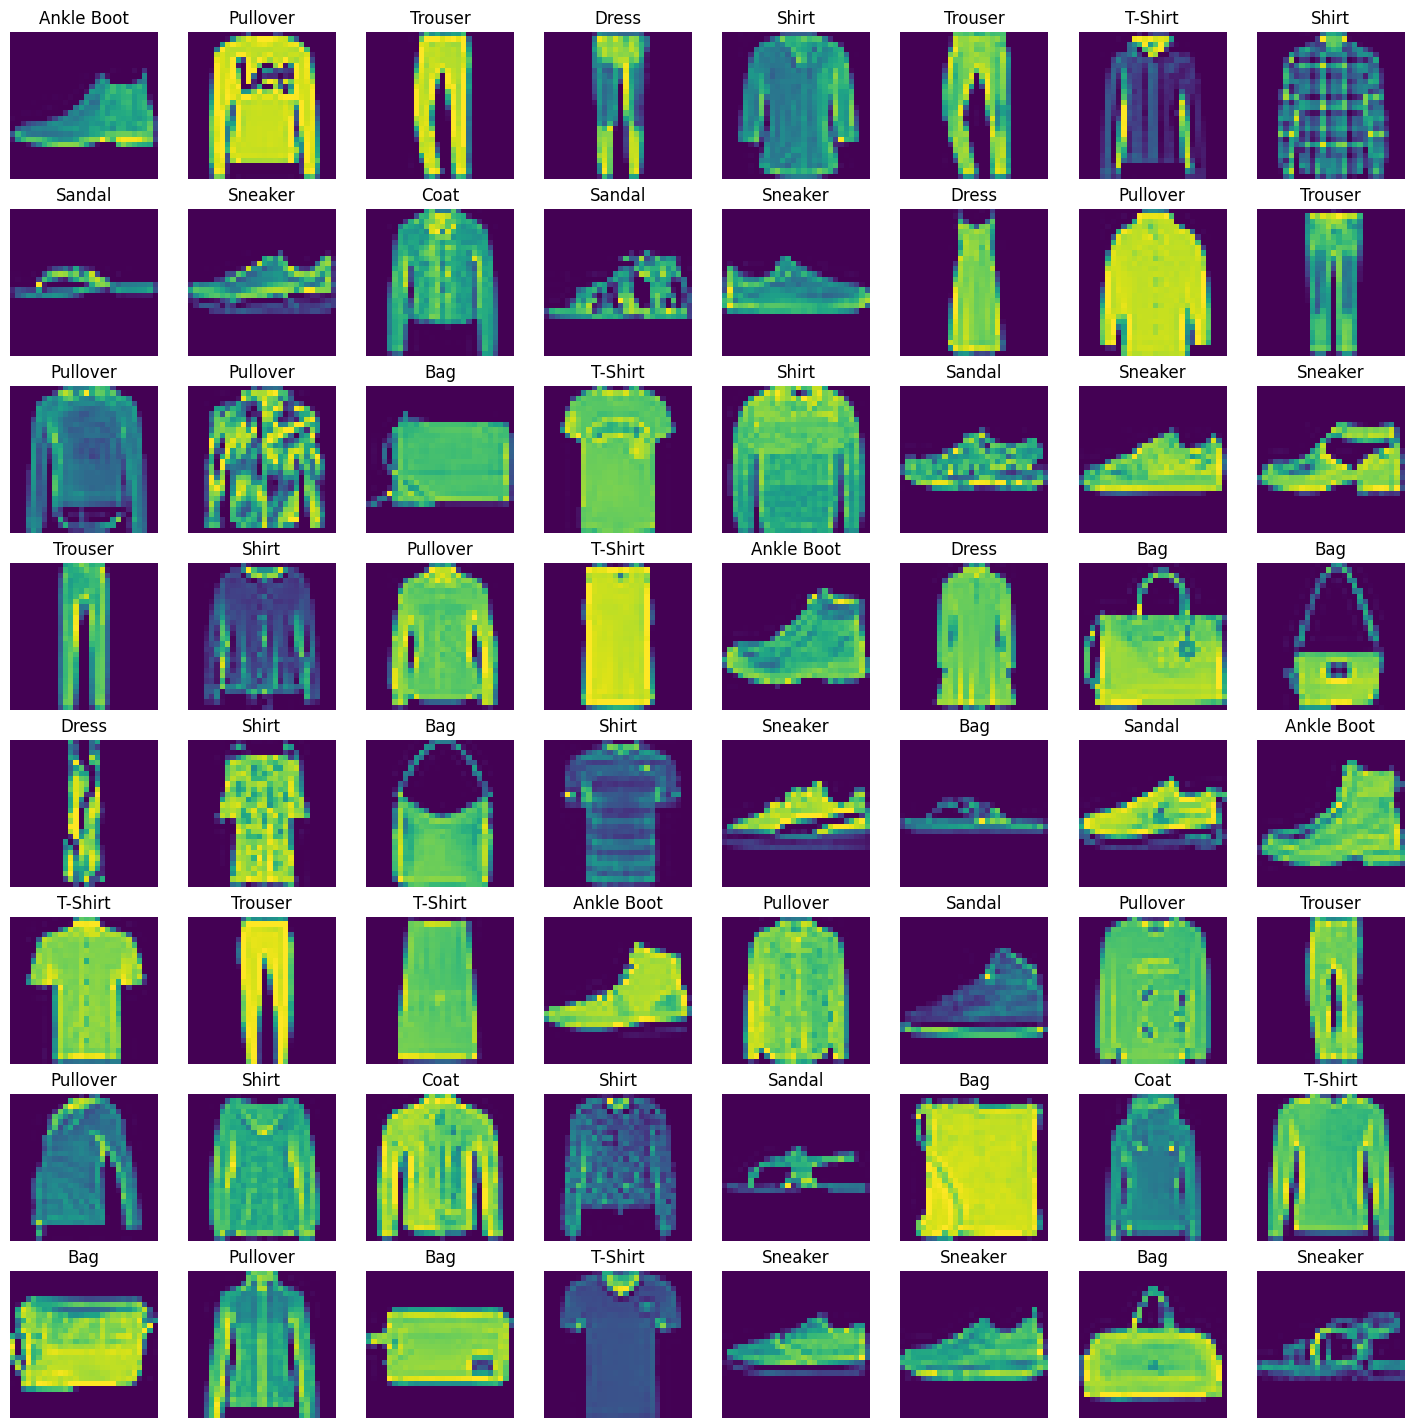

In [66]:
import matplotlib.pyplot as plt
import numpy as np
figure = plt.figure(figsize=(18, 18))
cols, rows = 8, 8
with torch.no_grad():
    for data in (testloader):
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        for i, label in enumerate(predicted):
            figure.add_subplot(rows, cols, i+1)
            plt.title(labels_map[int(label)])
            plt.axis("off")
            plt.imshow(torch.mean(images[i], dim=0))
        plt.show()
        break

In [ ]:
import torch
from torchvision import datasets, transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

embeddings = []
labels = []
with torch.no_grad():
    for images, target in testloader:
        embeddings.append(model(images).numpy())
        labels.append(target.numpy())
embeddings = np.concatenate(embeddings)
labels = np.concatenate(labels)

# Visualize the embeddings using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)

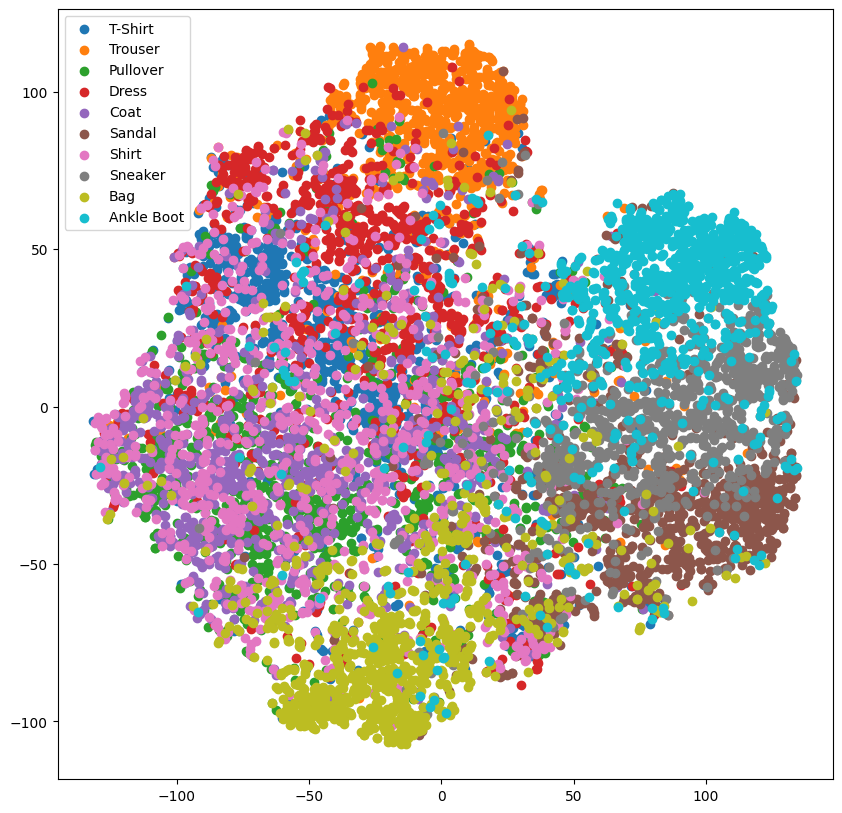

In [72]:
# Plot the embeddings
plt.figure(figsize=(10, 10))
for i in range(10):
    indices = np.where(labels == i)[0]
    plt.scatter(embeddings_tsne[indices, 0], embeddings_tsne[indices, 1], label=labels_map[i])
plt.legend()
plt.show()